In [4]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import KNNImputer


In [5]:
# Chargement du jeu de données
df =  pd.read_csv(r"C:\Users\bayem\Downloads\diabetes.csv")

In [6]:

# Aperçu des 5 premières lignes
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Vérification et traitement des valeurs manquantes

In [9]:
# Détection des valeurs manquantes
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#df.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [10]:
df.BMI.value_counts().sort_index()

BMI
0.0     11
18.2     3
18.4     1
19.1     1
19.3     1
        ..
53.2     1
55.0     1
57.3     1
59.4     1
67.1     1
Name: count, Length: 248, dtype: int64

In [15]:
for col in df.columns[:-1]:
    print(f"\n=== {col} : Value Counts ===")
    print(df[col].value_counts().sort_index().head(10))


=== Pregnancies : Value Counts ===
Pregnancies
0    111
1    135
2    103
3     75
4     68
5     57
6     50
7     45
8     38
9     28
Name: count, dtype: int64

=== Glucose : Value Counts ===
Glucose
0     5
44    1
56    1
57    2
61    1
62    1
65    1
67    1
68    3
71    4
Name: count, dtype: int64

=== BloodPressure : Value Counts ===
BloodPressure
0     35
24     1
30     2
38     1
40     1
44     4
46     2
48     5
50    13
52    11
Name: count, dtype: int64

=== SkinThickness : Value Counts ===
SkinThickness
0     227
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
Name: count, dtype: int64

=== Insulin : Value Counts ===
Insulin
0     374
14      1
15      1
16      1
18      2
22      1
23      2
25      1
29      1
32      1
Name: count, dtype: int64

=== BMI : Value Counts ===
BMI
0.0     11
18.2     3
18.4     1
19.1     1
19.3     1
19.4     1
19.5     2
19.6     3
19.9     1
20.0     1
Name: count, dtype: int64

=== Diabe

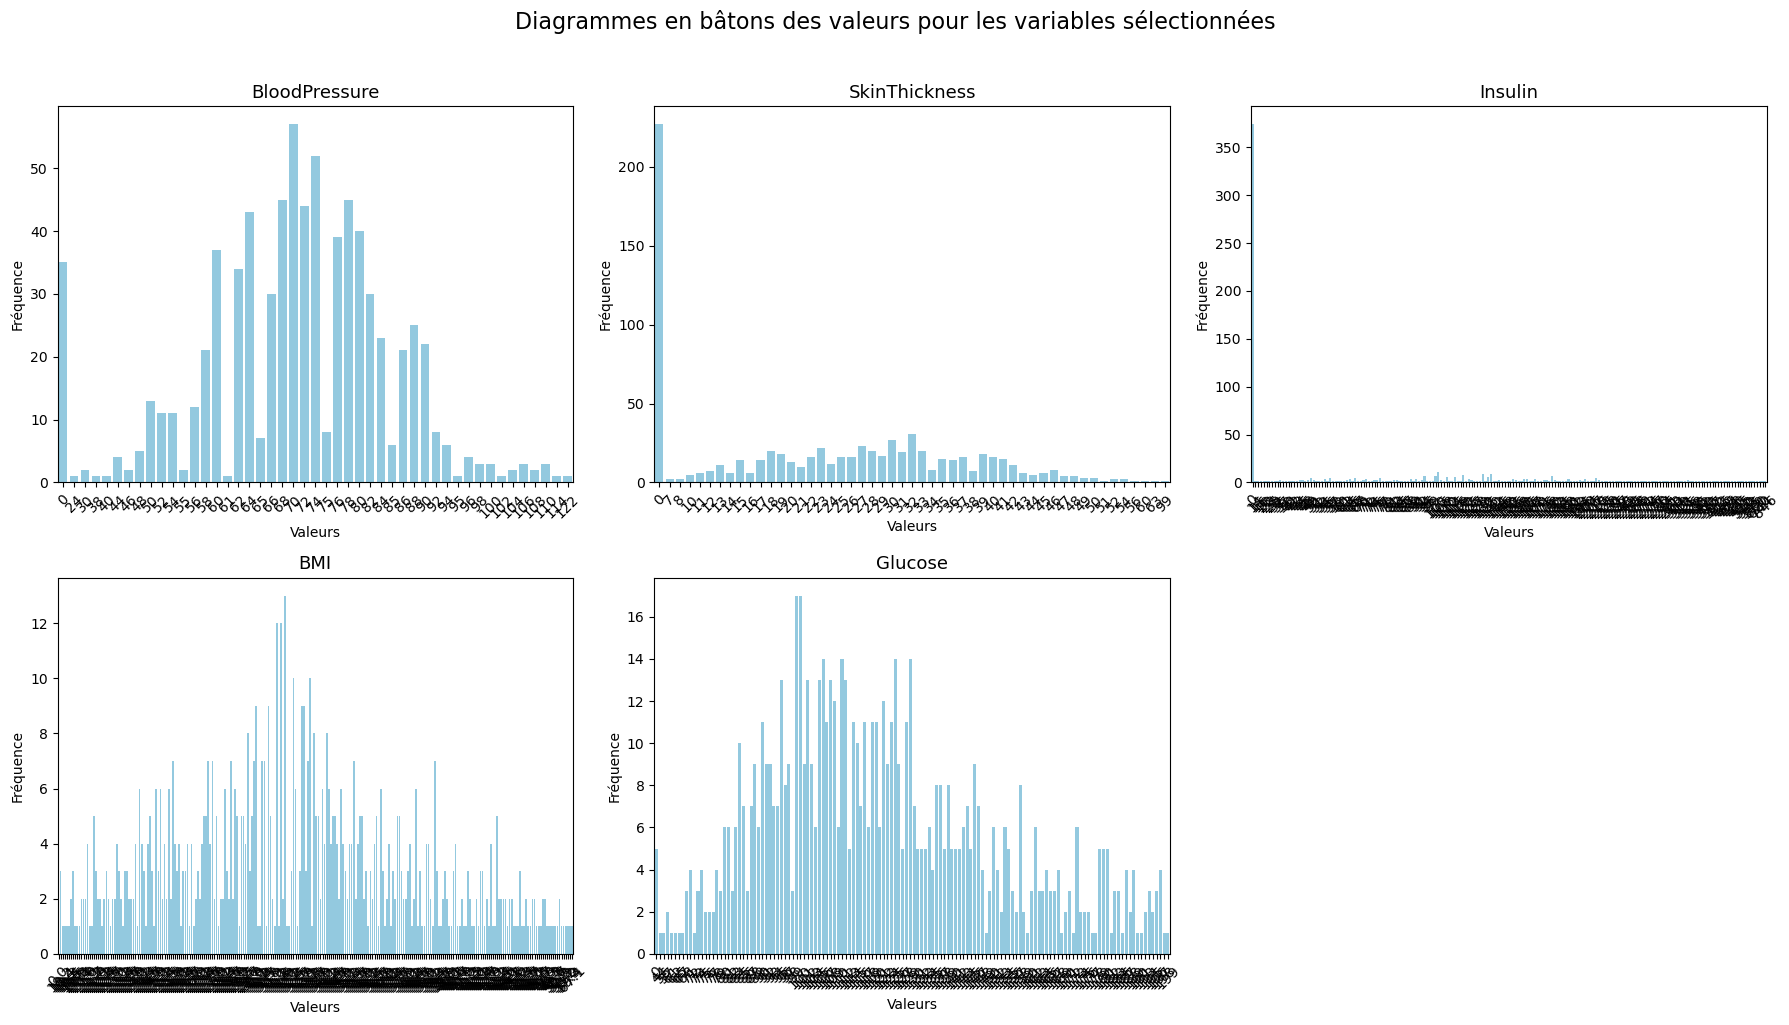

In [11]:


# Colonnes quantitatives sélectionnées
quant_cols = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Glucose']

# Créer la figure (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Diagrammes en bâtons des valeurs pour les variables sélectionnées", fontsize=16, y=1.02)

# Boucle sur les variables
for i, col in enumerate(quant_cols):
    row = i // 3    # Ligne (0 ou 1)
    col_pos = i % 3 # Colonne (0, 1 ou 2)
    
    counts = df[col].value_counts().sort_index()
    
    # Tracé du diagramme en bâtons
    sns.barplot(x=counts.index, y=counts.values, ax=axes[row, col_pos], color='skyblue')
    
    # Mise en forme
    axes[row, col_pos].set_title(col, fontsize=13)
    axes[row, col_pos].set_xlabel("Valeurs")
    axes[row, col_pos].set_ylabel("Fréquence")
    axes[row, col_pos].tick_params(axis='x', rotation=45)

# Supprimer la dernière case vide (en bas à droite)
axes[1, 2].axis("off")

# Ajustement de la mise en page
plt.tight_layout()
plt.show()


Les diagrammes en bâtons montrent une accumulation importante de zéros dans plusieurs variables physiologiques, notamment la pression artérielle  l'épaisseure de la peau et l'insuline.
Ces zéros ne sont pas réalistes médicalement et confirment **la présence de données manquantes non aléatoires (MNAR).**

In [12]:

# Vérification s’il y a des zéros considérés comme manquants (souvent pour glucose, insulin, BMI…)
#cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for c in quant_cols:
    df[c] = df[c].replace(0, np.nan)

# Nouvelle vérification
print(df.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


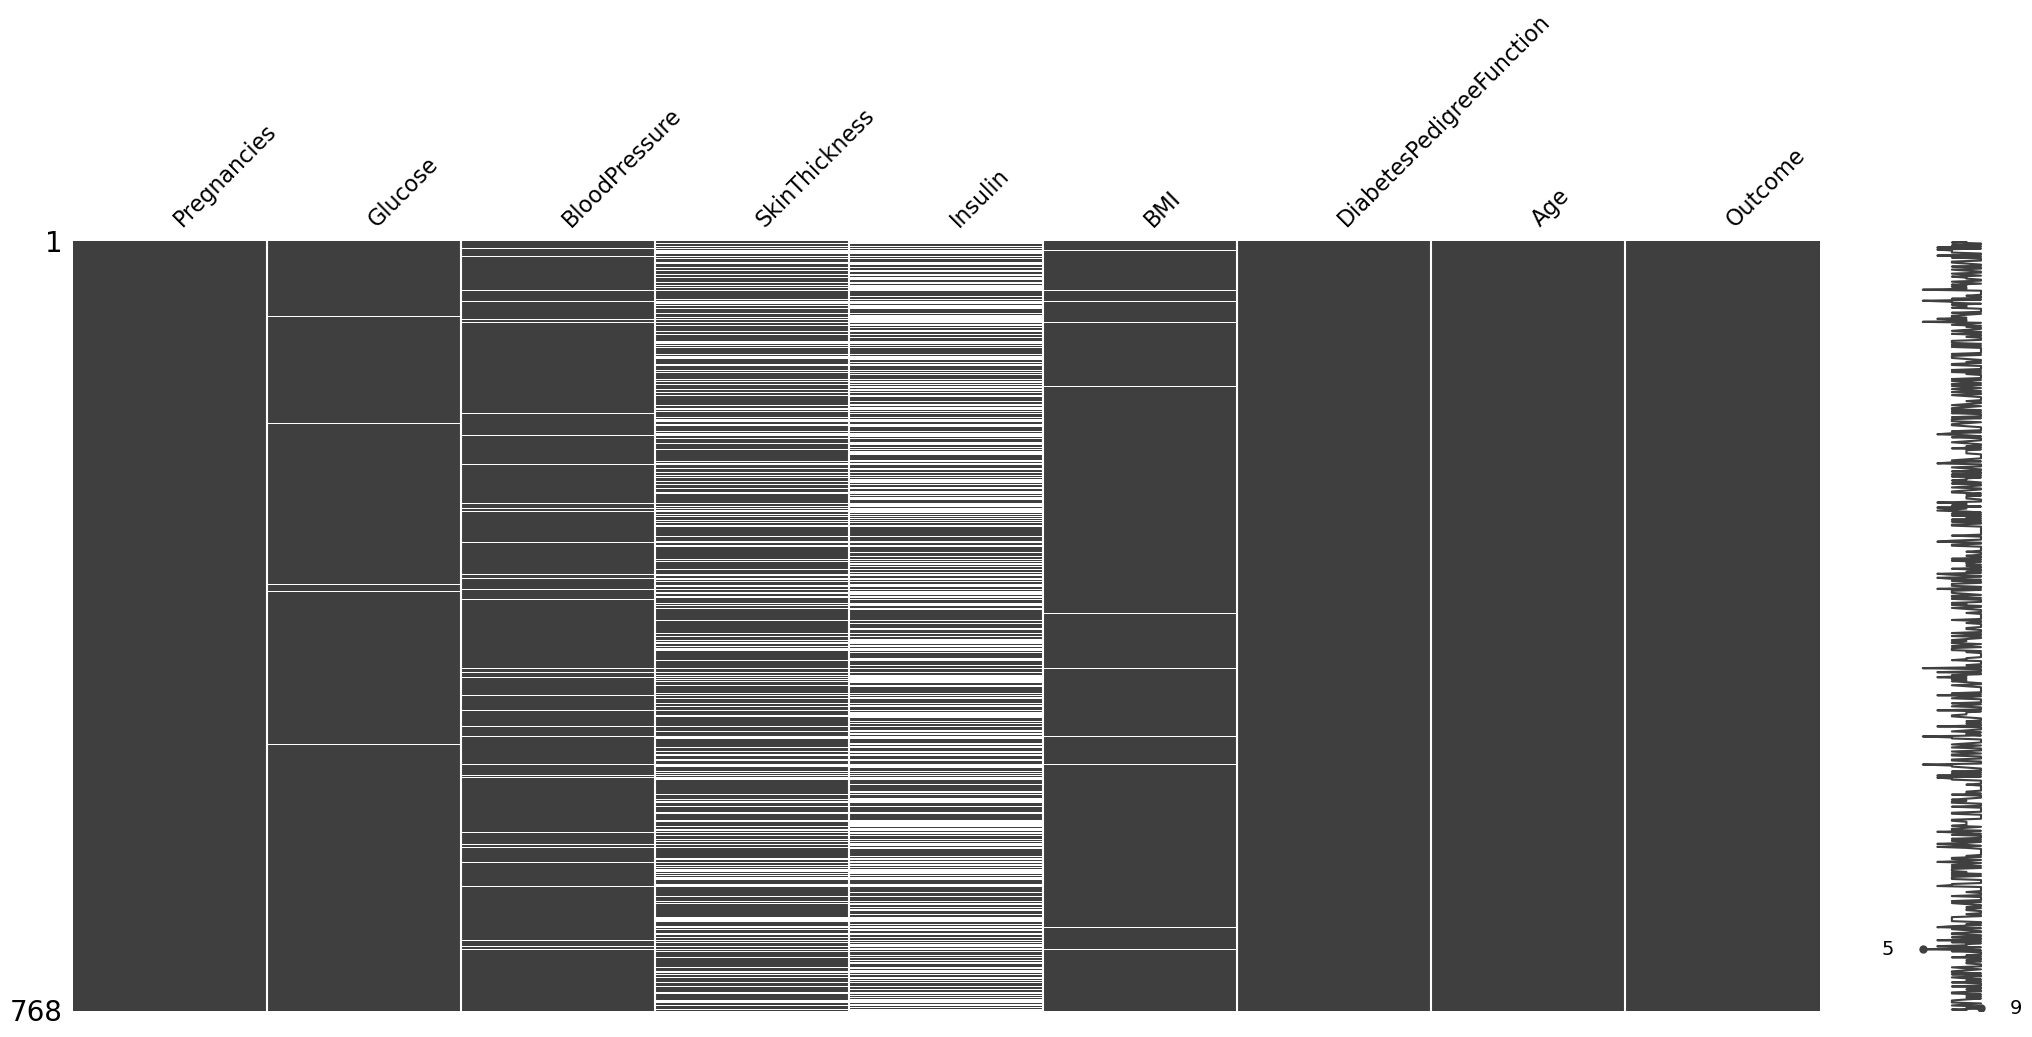

In [27]:
msno.matrix(df)
plt.show()

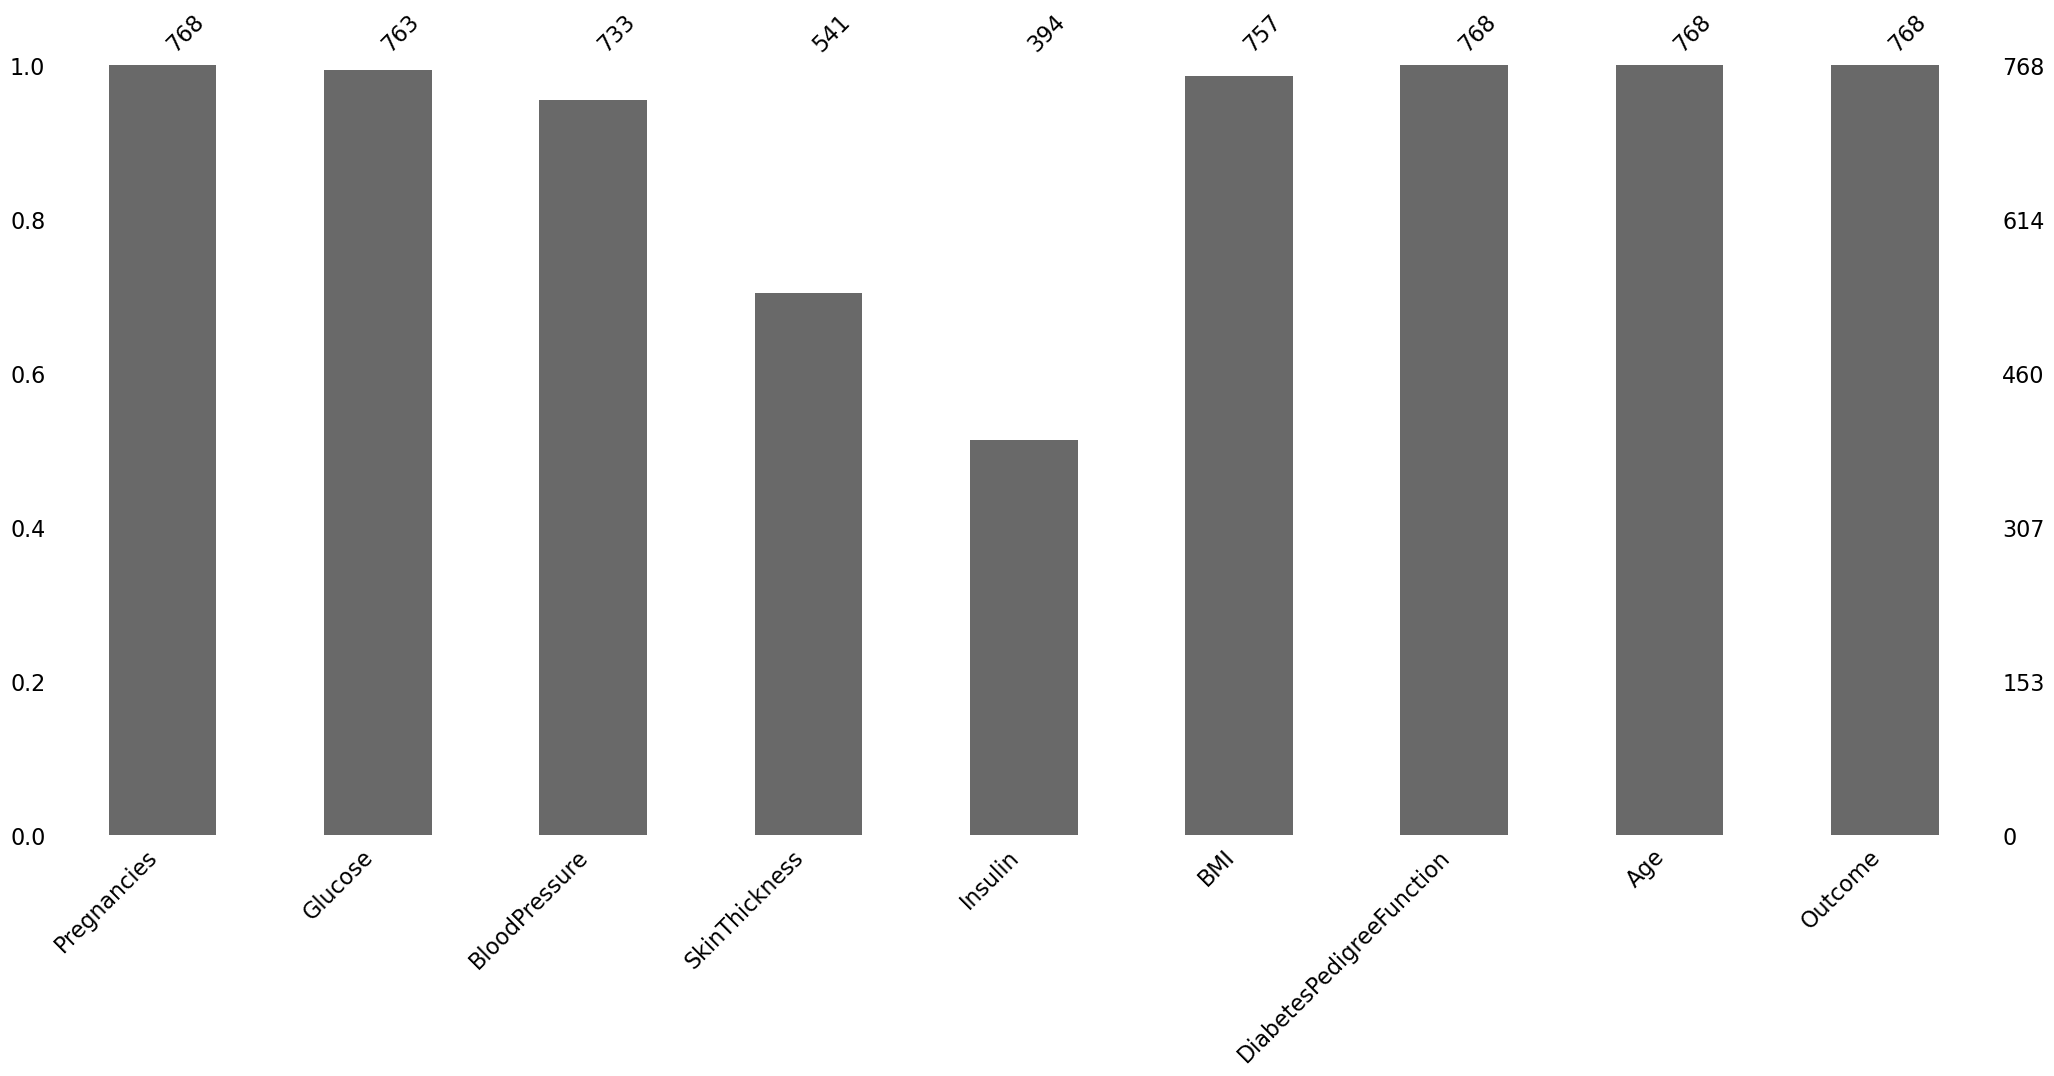

In [13]:
msno.bar(df)
plt.show()

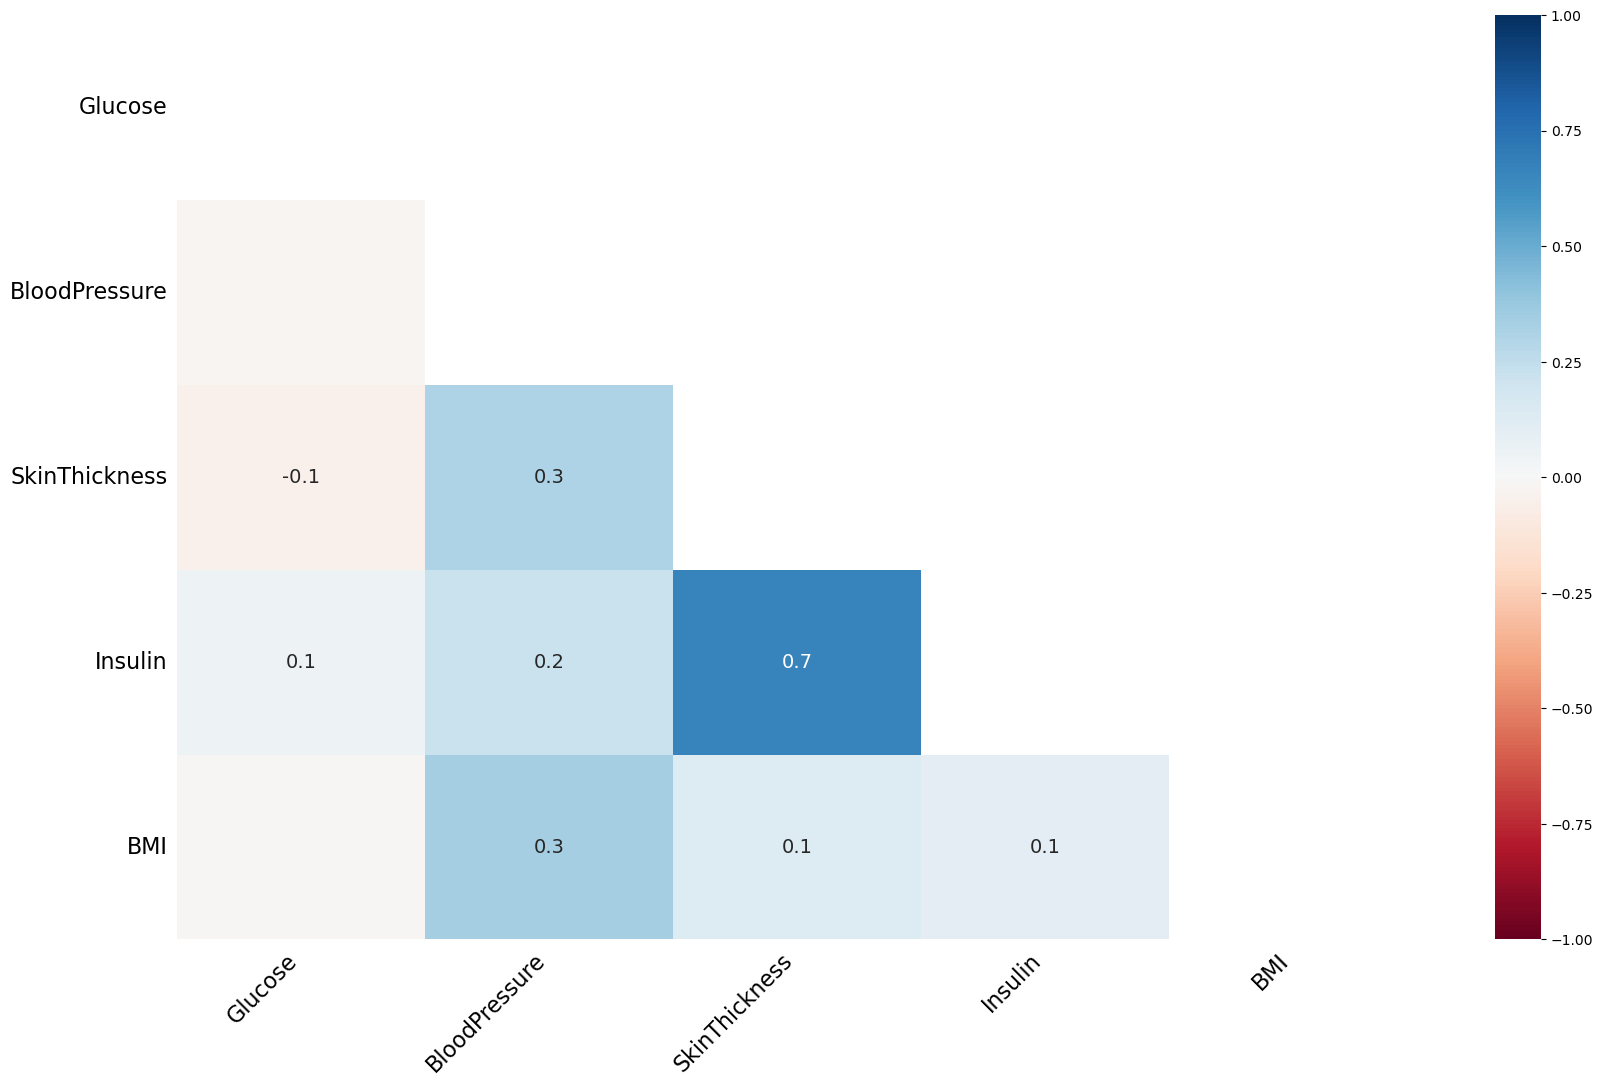

In [29]:
msno.heatmap(df)
plt.show()

La carte de corrélation des valeurs manquantes  montre que certaines variables présentent des absences corrélées.
En particulier, SkinThickness et Insulin ont une forte corrélation de **0,7**, ce qui signifie qu’elles sont souvent manquantes simultanément.
Ce motif indique un mécanisme de données manquantes non aléatoires (MNAR) : les deux variables dépendent probablement du même contexte de mesure (par exemple, examen clinique non effectué pour certains patients).
En revanche, BloodPressure semble moins liée, suggérant des absences plus indépendantes.

Les autres corrélations faibles indiquent que les autres colonnes prises 2 à 2 sont plus dispersées et probablement indépendantes.

<Axes: >

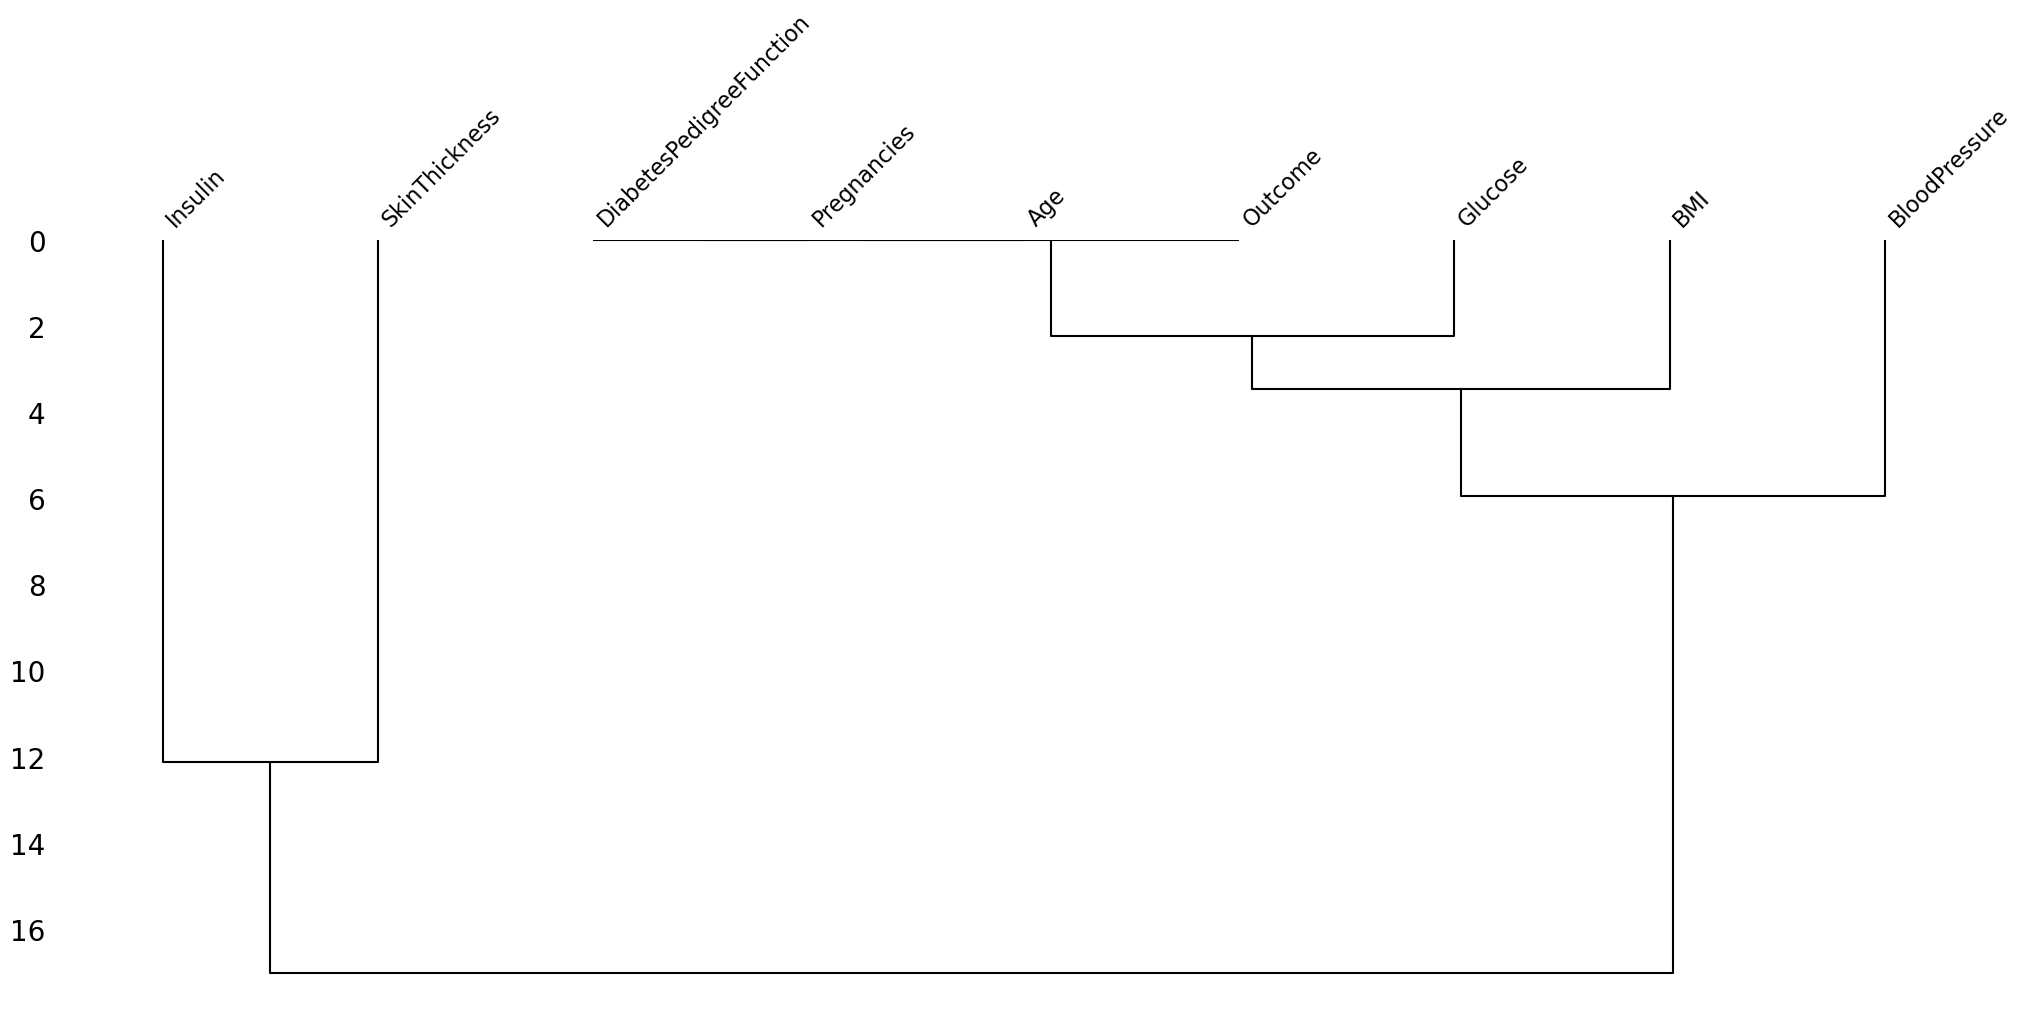

In [14]:
msno.dendrogram(df)

Le dendrogramme des valeurs manquantes montre que les variables **Insulin** et **SkinThickness** sont fortement liées : elles partagent le même schéma d’absence de données.
Cela signifie que lorsque la valeur de l’insuline est manquante, celle de l’épaisseur cutanée l’est souvent aussi.
Ce regroupement confirme le **mécanisme non aléatoire (MNAR)** déjà observé dans la heatmap : les deux mesures semblent manquer pour des raisons communes (par exemple, examen médical non réalisé).

## Traitement des valeurs manquantes

In [15]:
df['Insulin_missing'] = df['Insulin'].isnull().astype(int)
df['Skin_missing'] = df['SkinThickness'].isnull().astype(int)

#Cela permet de ne pas “perdre” l’information du manque.
#Le modèle d’apprentissage saura qu’une donnée imputée

In [16]:
imputer = KNNImputer(n_neighbors=5)
df[['Insulin', 'SkinThickness']] = imputer.fit_transform(df[['Insulin', 'SkinThickness']])

# Imputation par la méthode KNN Imputer,
#  afin d’estimer les valeurs manquantes à partir des observations similaires du jeu de données.

les colonnes "BloodPressure" , "Glucose" et "BMI" ayant une faible proportion de valeurs manquantes , nous allons appliquer l'imputation par la médiane pour eviter des valeurs extremes 

In [17]:
cols_faibles=  ["Glucose", "BloodPressure","BMI"]
for col in cols_faibles:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

C:\Users\bayem\AppData\Local\Temp\ipykernel_7544\4002747020.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


## Détecter les valeurs extrêmes et proposer, si nécessaire, un traitement adapté.

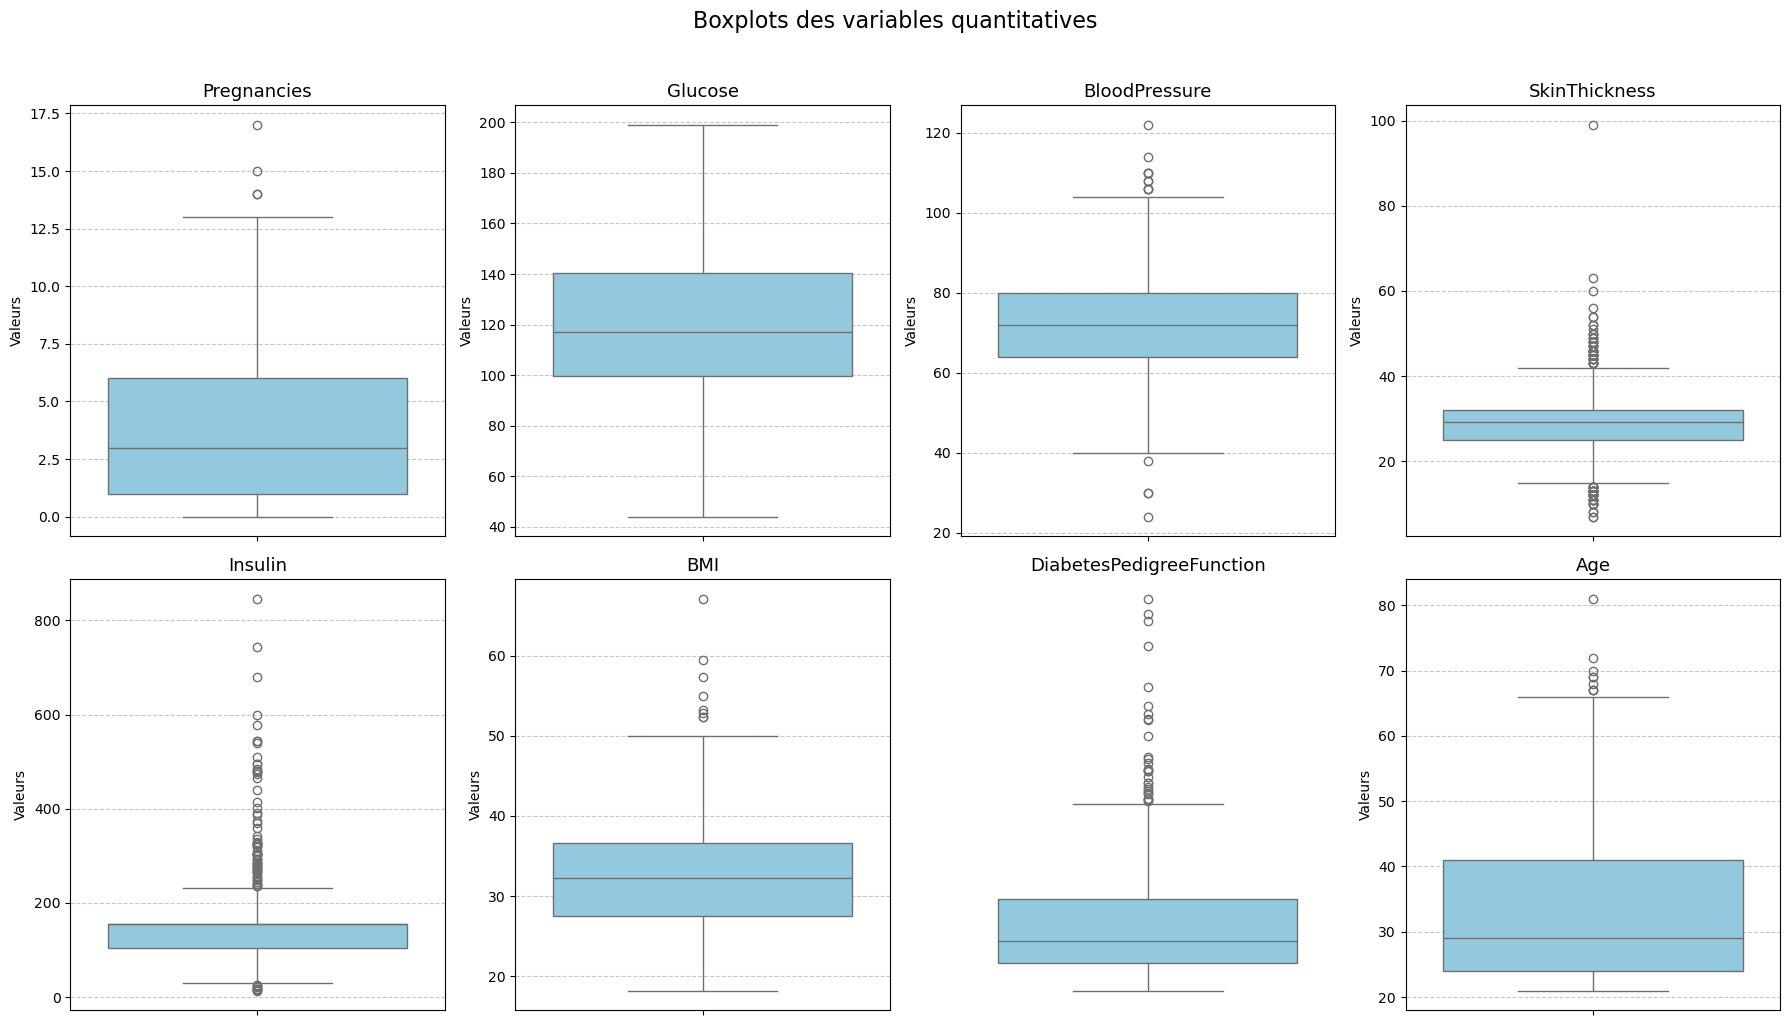

In [18]:


# Colonnes quantitatives à analyser
quant_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Créer la grille (2 lignes × 3 colonnes)
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle("Boxplots des variables quantitatives", fontsize=16, y=1.02)

# Boucle sur les colonnes et les axes
for i, col in enumerate(df.columns[:-3]):
    row = i // 4  # Ligne
    col_pos = i % 4  # Colonne
    
    sns.boxplot(y=df[col], ax=axes[row, col_pos], color='skyblue')
    axes[row, col_pos].set_title(col, fontsize=13)
    axes[row, col_pos].set_xlabel("")
    axes[row, col_pos].set_ylabel("Valeurs")
    axes[row, col_pos].grid(True, axis='y', linestyle='--', alpha=0.7)

# Supprimer la dernière case vide (car on a 5 variables seulement)
axes[1, 2].axis('off')

# Ajuster la disposition
plt.tight_layout()
plt.show()


Les boxplots ont permis de visualiser les distributions de toutes les variables quantitatives et des valeurs extrêmes ont été observées dans plusieurs variables, notamment :Insulin : plusieurs valeurs très élevées (> 300 jusqu’à 850).
SkinThickness : valeurs supérieures à 60.
BloodPressure : quelques valeurs inférieures à 40 mmHg.
BMI : valeurs inférieures à 20 et supérieures à 50.
Glucose : valeurs inférieures à 50.
Pregnancies : quelques cas dépassant 15 grossesses.
Age : rares observations au-dessus de 70 ans.

## Traitement des valeurs aberrantes avec Winsorisation basée sur IQR

In [19]:
# Colonnes à traiter
cols_outliers = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Winsorisation basée sur IQR
for col in cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

# Winsorisation légère optionnelle pour Age et Pregnancies
df['Age'] = df['Age'].clip(upper=70)
df['Pregnancies'] = df['Pregnancies'].clip(upper=12)


## Vérification visuelle après traitement

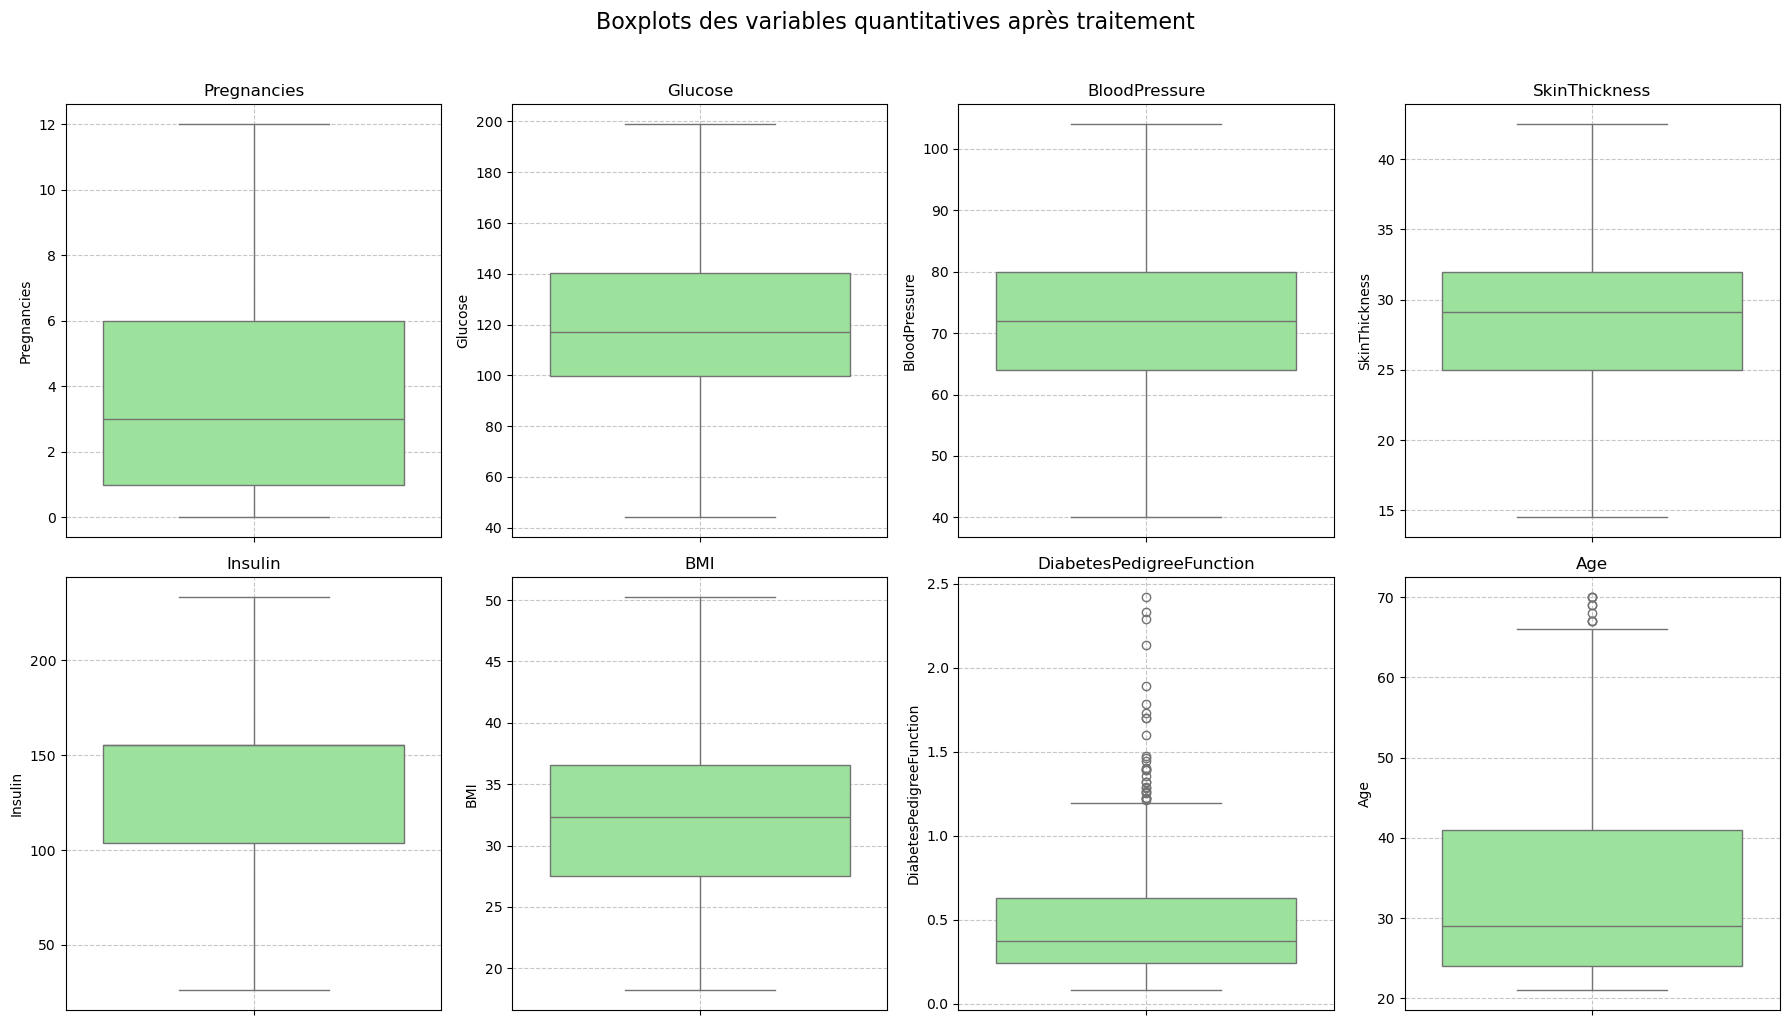

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

quant_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
              'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle("Boxplots des variables quantitatives après traitement", fontsize=16, y=1.02)

for i, col in enumerate(quant_cols):
    row, col_pos = divmod(i, 4)
    sns.boxplot(y=df[col], ax=axes[row, col_pos], color='lightgreen')
    axes[row, col_pos].set_title(col)
    axes[row, col_pos].set_xlabel("")
    axes[row, col_pos].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


L’analyse des boxplots a permis d’identifier plusieurs valeurs extrêmes dans les variables physiologiques, notamment Insulin, SkinThickness, BloodPressure, BMI et Glucose.
Après vérification du contexte, les valeurs cliniquement plausibles (comme Age > 70 ou Pregnancies > 15) ont été conservées, tandis que les valeurs incohérentes ont été corrigées par Winsorisation. Pour la variable DiabetesPedigreeFunction, on a quelques valeurs supérieures à 2.0, considérées comme extrêmes par la méthode IQR, mais ces valeurs sont normales, car elles indiquent simplement un risque génétique plus élevé de diabète.

Ce traitement a permis d’obtenir un jeu de données plus homogène et fiable, sans altérer la représentativité de la population étudiée.
Les données sont désormais prêtes pour les étapes d’analyse descriptive et de modélisation prédictive.

## Analyse des distributions des variables numériques et catégorielles

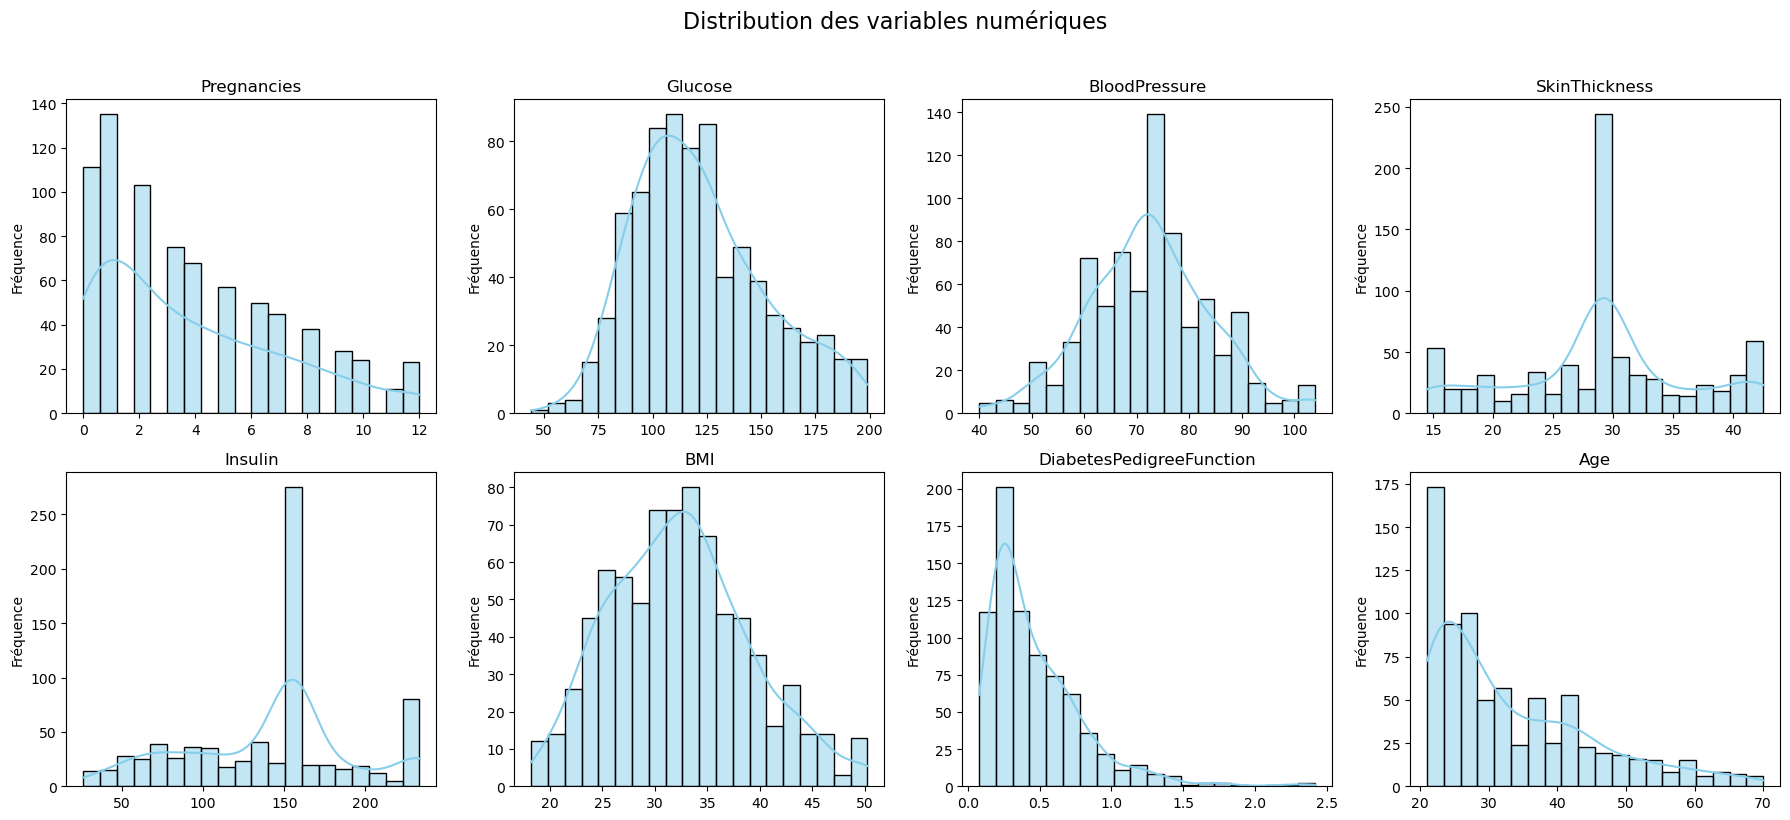

In [21]:

# Liste des variables numériques
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Grille 2x4
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
fig.suptitle("Distribution des variables numériques", fontsize=16, y=1.02)

for i, col in enumerate(num_cols):
    row, col_pos = divmod(i, 4)
    sns.histplot(df[col], bins=20, kde=True, ax=axes[row, col_pos], color='skyblue')
    axes[row, col_pos].set_title(col)
    axes[row, col_pos].set_xlabel("")
    axes[row, col_pos].set_ylabel("Fréquence")

plt.tight_layout()
plt.show()


La majorité des variables quantitatives montrent une asymétrie positive : la queue de la distribution est plus longue vers les grandes valeurs.
Ce comportement est typique des données biométriques, où les valeurs élevées (comme le glucose ou l’IMC) sont rares mais significatives.
Le jeu de données reste globalement cohérent et reflète bien la variabilité physiologique des patientes.
Des transformations logarithmiques seront envisagées pour les variables Insulin, BMI, DPF avant la modélisation afin d’améliorer la normalité.

C:\Users\bayem\AppData\Local\Temp\ipykernel_7544\4032420885.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='pastel')


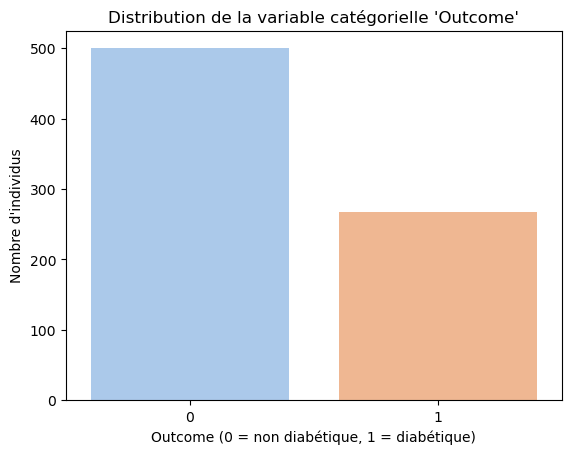

In [22]:
sns.countplot(x='Outcome', data=df, palette='pastel')
plt.title("Distribution de la variable catégorielle 'Outcome'")
plt.xlabel("Outcome (0 = non diabétique, 1 = diabétique)")
plt.ylabel("Nombre d'individus")
plt.show()


La variable Outcome montre que 65 % des patientes sont non diabétiques (0) et 35 % sont diabétiques (1).
Cette différence indique un déséquilibre modéré entre les deux classes, ce qui est courant dans les données médicales.
Cependant, ce déséquilibre peut influencer les modèles prédictifs, qui risquent de favoriser la classe majoritaire.
il est recommandé d’utiliser un échantillonnage équilibré (comme SMOTE) ou des pondérations de classe
pour corriger ce biais lors de la modélisation.

In [24]:
#sns.scatterplot(data=df,x="BMI",y="Insulin",hue="Outcome")
#grille tous les nuage de points avec le parametre hue ="outcome"
#histogramme

## Mesures descriptives des variables numériques

In [23]:
# Sélection des variables numériques
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Calcul des statistiques descriptives
desc_stats = df[num_cols].describe().T
desc_stats['variance'] = df[num_cols].var()
desc_stats['mediane'] = df[num_cols].median()
desc_stats = desc_stats[['count','mean','std','min','25%','mediane','50%','75%','max','variance']]

# Affichage
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
print(desc_stats)


                          count   mean   std   min    25%  mediane    50%  \
Pregnancies              768.00   3.82  3.29  0.00   1.00     3.00   3.00   
Glucose                  768.00 121.66 30.44 44.00  99.75   117.00 117.00   
BloodPressure            768.00  72.36 11.70 40.00  64.00    72.00  72.00   
SkinThickness            768.00  28.91  7.44 14.50  25.00    29.15  29.15   
Insulin                  768.00 140.73 51.97 26.05 103.75   155.55 155.55   
BMI                      768.00  32.39  6.67 18.20  27.50    32.30  32.30   
DiabetesPedigreeFunction 768.00   0.47  0.33  0.08   0.24     0.37   0.37   
Age                      768.00  33.22 11.70 21.00  24.00    29.00  29.00   

                            75%    max  variance  
Pregnancies                6.00  12.00     10.82  
Glucose                  140.25 199.00    926.49  
BloodPressure             80.00 104.00    136.82  
SkinThickness             32.00  42.50     55.41  
Insulin                  155.55 233.25   2700.49  


Les statistiques descriptives montrent que le jeu de données est cohérent et représentatif d’une population adulte.
Les valeurs minimales et maximales restent dans des intervalles plausibles pour des données médicales.
Les variables Glucose, BMI et Insulin présentent une forte dispersion, ce qui indique une variabilité physiologique réelle entre patientes.
La variable BloodPressure est plus stable et normalement distribuée.
La moyenne d’âge (33 ans) confirme que la majorité des patientes sont jeunes à d’âge moyen.
Le score DPF montre une majorité de patientes à faible risque génétique, mais quelques cas à risque élevé (>2.0).

## Exploration des relations entre variables

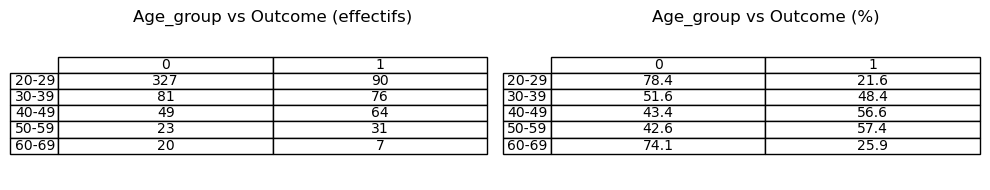

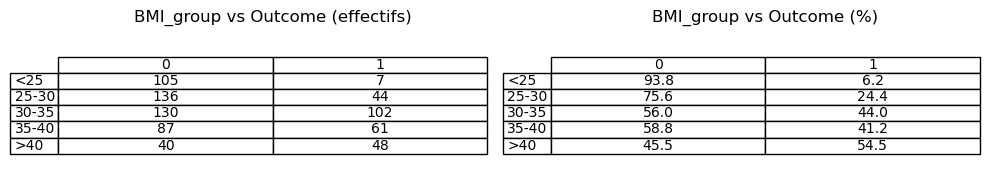

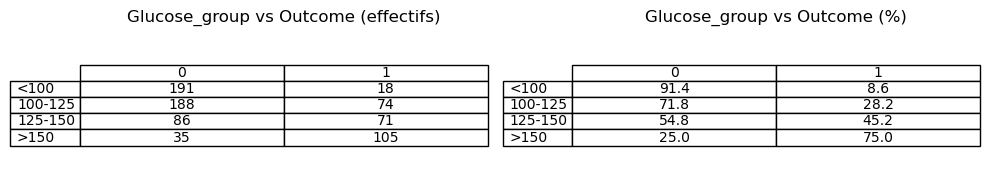

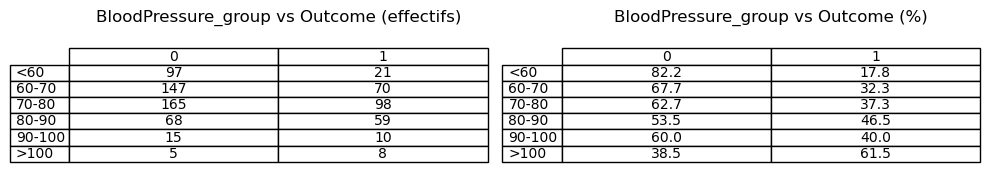

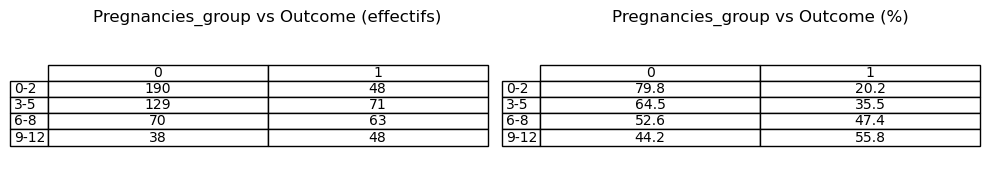

In [35]:
# === Discrétisation des variables continues ===
df['Age_group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70],
                         labels=['20-29', '30-39', '40-49', '50-59', '60-69'])

df['BMI_group'] = pd.cut(df['BMI'], bins=[15, 25, 30, 35, 40, 50],
                         labels=['<25', '25-30', '30-35', '35-40', '>40'])

df['Glucose_group'] = pd.cut(df['Glucose'], bins=[40, 100, 125, 150, 200],
                             labels=['<100', '100-125', '125-150', '>150'])

df['BloodPressure_group'] = pd.cut(df['BloodPressure'], bins=[40, 60, 70, 80, 90, 100, 110],
                                   labels=['<60', '60-70', '70-80', '80-90', '90-100', '>100'])

df['Pregnancies_group'] = pd.cut(df['Pregnancies'], bins=[0, 2, 5, 8, 12],
                                 labels=['0-2', '3-5', '6-8', '9-12'])


# === Fonction pour afficher les tableaux croisés côte à côte ===

def afficher_tableau_croise(var):
    # Tableau croisé (effectifs et pourcentages)
    table_counts = pd.crosstab(df[var], df['Outcome'])
    table_percent = pd.crosstab(df[var], df['Outcome'], normalize='index') * 100

    # Création d'une figure avec 2 sous-graphiques côte à côte
    fig, axes = plt.subplots(1, 2, figsize=(10, 2))

    # Premier tableau : effectifs
    axes[0].axis('off')
    axes[0].set_title(f"{var} vs Outcome (effectifs)", fontsize=12)
    axes[0].table(cellText=table_counts.values,
                  rowLabels=table_counts.index,
                  colLabels=table_counts.columns,
                  cellLoc='center', loc='center')

    # Deuxième tableau : pourcentages
    axes[1].axis('off')
    axes[1].set_title(f"{var} vs Outcome (%)", fontsize=12)
    axes[1].table(cellText=table_percent.round(1).values,
                  rowLabels=table_percent.index,
                  colLabels=table_percent.columns,
                  cellLoc='center', loc='center')

    plt.tight_layout()
    plt.show()

# === Exécution pour chaque variable catégorisée ===
for var in ['Age_group', 'BMI_group', 'Glucose_group', 'BloodPressure_group', 'Pregnancies_group']:
    afficher_tableau_croise(var)


L’analyse des tableaux croisés met en évidence plusieurs relations fortes entre la variable Outcome et les caractéristiques des patientes :
Glucose, IMC, Âge, Pression artérielle et Grossesses influencent tous la probabilité d’être diabétique.
Ces tendances confirment les facteurs de risque connus : hyperglycémie, surpoids, âge élevé et antécédents obstétriques multiples.
Ces relations seront représentées visuellement dans la section suivante à l’aide de graphes bivariés pour faciliter l’interprétation.

## Visualisations univariées et bivariées

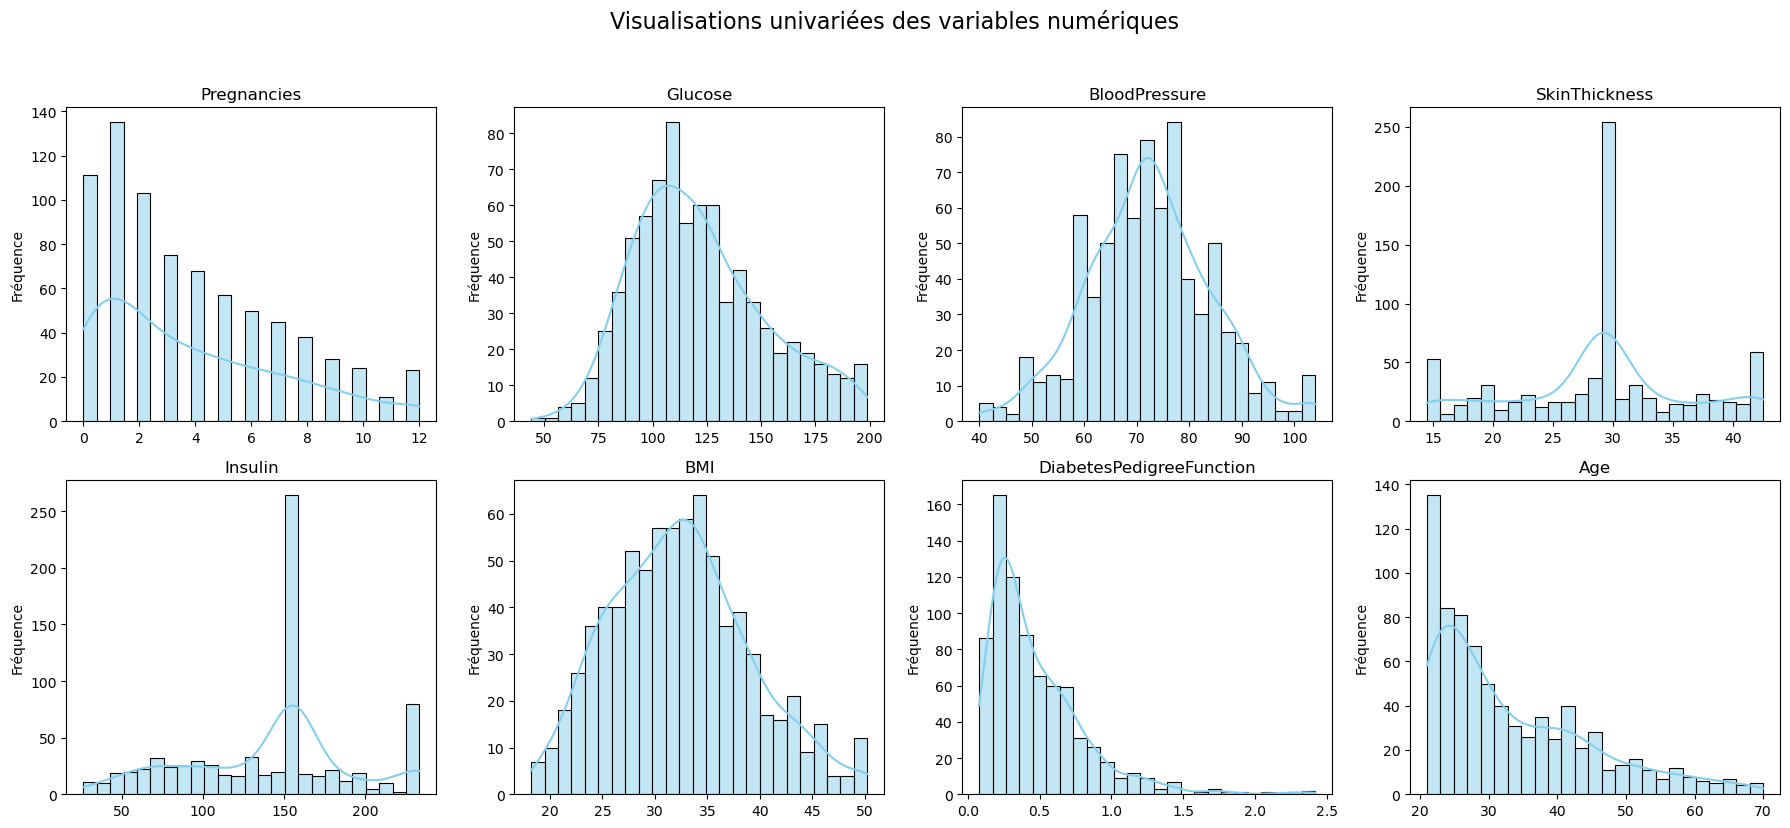

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables numériques
num_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
            'Insulin','BMI','DiabetesPedigreeFunction','Age']

# Grille de 2 lignes × 4 colonnes
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
fig.suptitle("Visualisations univariées des variables numériques", fontsize=16, y=1.03)

for i, col in enumerate(num_cols):
    row, col_pos = divmod(i, 4)
    sns.histplot(df[col], kde=True, ax=axes[row, col_pos], color='skyblue', bins=25)
    axes[row, col_pos].set_title(col)
    axes[row, col_pos].set_xlabel('')
    axes[row, col_pos].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


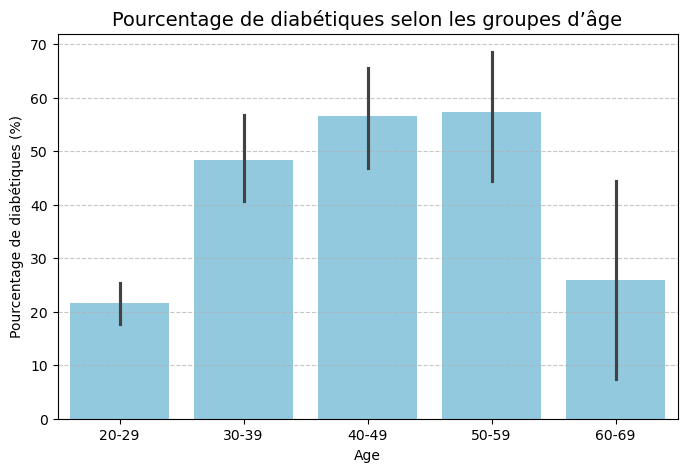

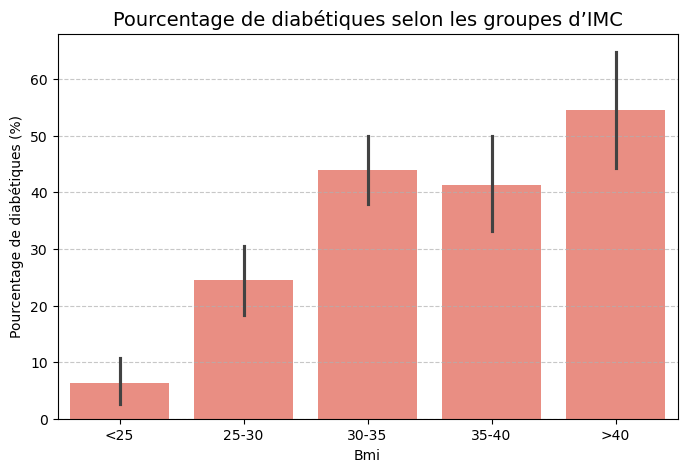

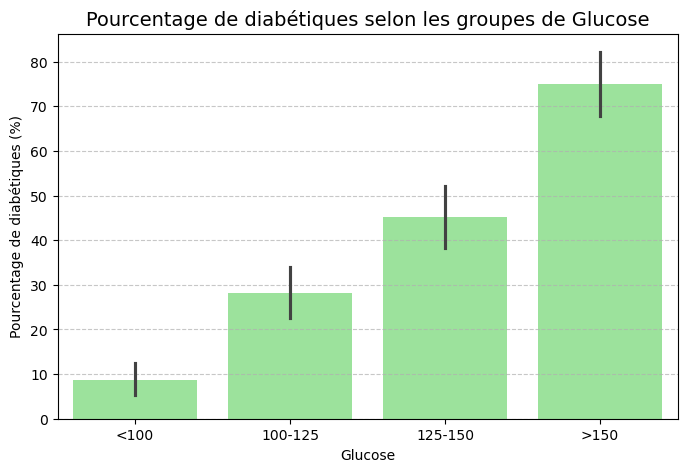

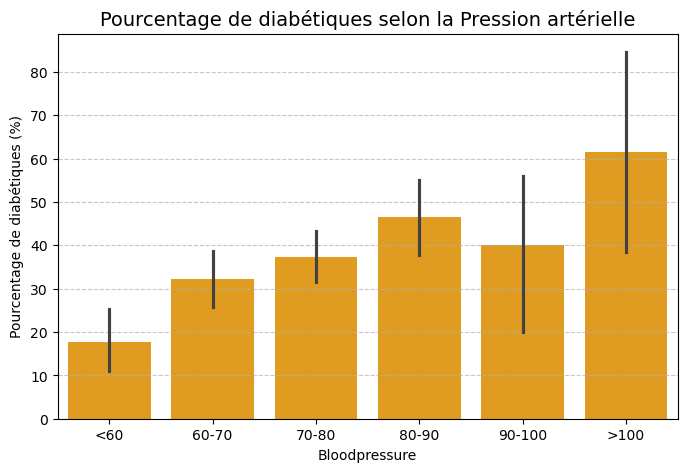

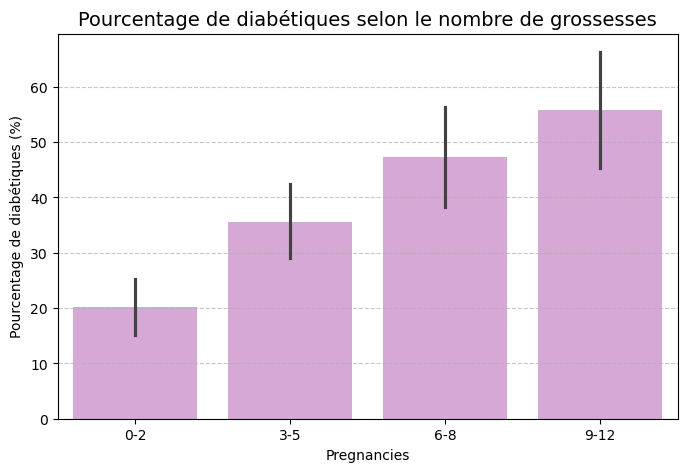

In [40]:

# Définition des catégories 
df['Age_group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70],
                         labels=['20-29','30-39','40-49','50-59','60-69'])
df['BMI_group'] = pd.cut(df['BMI'], bins=[15, 25, 30, 35, 40, 50],
                         labels=['<25','25-30','30-35','35-40','>40'])
df['Glucose_group'] = pd.cut(df['Glucose'], bins=[40, 100, 125, 150, 200],
                             labels=['<100','100-125','125-150','>150'])
df['BloodPressure_group'] = pd.cut(df['BloodPressure'], bins=[40, 60, 70, 80, 90, 100, 110],
                                   labels=['<60','60-70','70-80','80-90','90-100','>100'])
df['Pregnancies_group'] = pd.cut(df['Pregnancies'], bins=[0, 2, 5, 8, 12],
                                 labels=['0-2','3-5','6-8','9-12'])

# Fonction pour créer un barplot standardisé
def barplot_relation(variable, couleur, titre):
    plt.figure(figsize=(8,5))
    sns.barplot(x=variable, y='Outcome', data=df,
                estimator=lambda x: 100 * sum(x)/len(x),
                color=couleur)
    plt.title(titre, fontsize=14)
    plt.xlabel(variable.replace('_group', '').capitalize())
    plt.ylabel('Pourcentage de diabétiques (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Création des barplots
barplot_relation('Age_group', 'skyblue', 'Pourcentage de diabétiques selon les groupes d’âge')
barplot_relation('BMI_group', 'salmon', 'Pourcentage de diabétiques selon les groupes d’IMC')
barplot_relation('Glucose_group', 'lightgreen', 'Pourcentage de diabétiques selon les groupes de Glucose')
barplot_relation('BloodPressure_group', 'orange', 'Pourcentage de diabétiques selon la Pression artérielle')
barplot_relation('Pregnancies_group', 'plum', 'Pourcentage de diabétiques selon le nombre de grossesses')


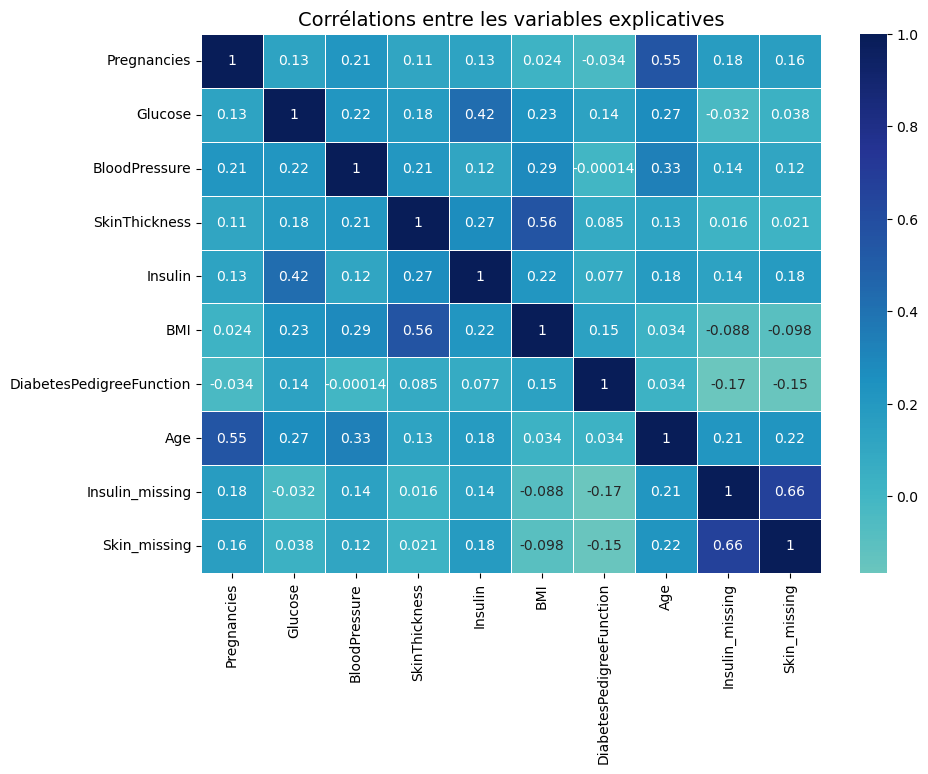

In [41]:
# Matrice de corrélation sans la variable cible
corr_vars = df.drop(columns=['Outcome']).corr(numeric_only=True)

plt.figure(figsize=(10,7))
sns.heatmap(corr_vars, annot=True, cmap='YlGnBu', center=0, linewidths=0.5)
plt.title("Corrélations entre les variables explicatives", fontsize=14)
plt.show()


In [27]:
#Identication des couples les plus corrélés
corr_pairs = corr_vars.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[(corr_pairs < 0.999) & (corr_pairs > 0.3)]  # garder corrélations > 0.3
print(corr_pairs)

Insulin_missing  Skin_missing      0.66
Skin_missing     Insulin_missing   0.66
SkinThickness    BMI               0.56
BMI              SkinThickness     0.56
Age              Pregnancies       0.55
Pregnancies      Age               0.55
Glucose          Insulin           0.42
Insulin          Glucose           0.42
Age              BloodPressure     0.33
BloodPressure    Age               0.33
dtype: float64


La matrice de corrélation confirme la cohérence interne du jeu de données :
les relations physiologiques attendues sont bien présentes (âge et grossesses, glucose et insuline, BMI et SkinThickness).
Les couples les plus pertinents (notamment Glucose–Insulin et BMI–SkinThickness) méritent une attention particulière dans la construction des modèles prédictifs.
Par ailleurs, l’absence de fortes corrélations multiples (> 0.8) montre qu’il n’existe pas de redondance excessive entre les variables, ce qui est idéal pour les futures étapes de modélisation.


## Conclusion générale

L’ensemble des analyses confirme la qualité et la cohérence du jeu de données après nettoyage.
Les variables Glucose, BMI, Age et Insulin ressortent comme les facteurs les plus liés au diabète.
Les données sont désormais prêtes pour la phase de modélisation prédictive, où les méthodes d’apprentissage supervisé (comme la régression logistique, les forêts aléatoires ou le KNN) pourront être appliquées pour prédire la probabilité de diabète.